<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session6/Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.utils import np_utils

 Batch Normalization 
 Dropout
 11 beforeMax Pooling
3 max pooling
With Full pading



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

NameError: ignored

In [0]:

# Define the model
model = Sequential()
model.add(Convolution2D(24, 3, 3, border_mode='same', input_shape=(32, 32, 3)))#32
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Dropout(0.25))

#Spatially Separable Convolution
model.add(Convolution2D(48, 3, 1,border_mode='same'))#32
model.add(Convolution2D(48, 1, 3,border_mode='same'))#32
#model.add(SeparableConv2D(ch, 3, padding="same"))
model.add(Activation('relu'))



model.add(Convolution2D(48,(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#16
model.add(BatchNormalization())
model.add(Dropout(0.25))

#DepthWise convolution
#keras.layers.DepthwiseConv2D(kernel_size, strides=(1, 1), padding='valid', depth_multiplier=1, data_format=None, activation=None, use_bias=True, depthwise_initializer='glorot_uniform',
#bias_initializer='zeros', depthwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, bias_constraint=None)
#model.add(96,padding='valid',activation='relu',)
#model.add(Convolution2D(96, 3, 3, border_mode='same'))#16
model.add(DepthwiseConv2D(96,3,padding='same'))

model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3,border_mode='same'))#16
model.add(Activation('relu'))

#model.add(Convolution2D(48,(1, 1), activation='relu'))#16
model.add(MaxPooling2D(pool_size=(2, 2)))#7 
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Convolution2D(96, 3, 3, border_mode='same'))#8
#model.add(Convolution2D(96, 3, 3, border_mode='same'))#8
#
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))#8
model.add(Activation('relu'))


model.add(Convolution2D(96,(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#4
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(192,(3,3)))#2
model.add(Convolution2D(num_classes,(2,2)))
          

model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.summary()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.


NameError: ignored

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
"""
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(96, (3, 3))#30
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))#15
model.add(Convolution2D(48,(1, 1), activation='relu')) 

model.add(Convolution2D(48,(3, 3), border_mode='same'))#15
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))#13
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#6
model.add(Dropout(0.25))
model.add(Convolution2D(48,(1, 1), activation='relu'))

model.add(Convolution2D(96, 3, 3, border_mode='same'))#6
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))#4
model.add(Activation('relu'))

#model.add(MaxPooling2D(pool_size=(2, 2)))#2
model.add(Convolution2D(192,(3,3)))

model.add(Convolution2D(num_classes,(2,2)))
          
model.add(Flatten())
model.add(Activation('softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
"""


"\n# Define the model\nmodel = Sequential()\nmodel.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))\nmodel.add(Activation('relu'))\n\nmodel.add(Convolution2D(96, (3, 3))#30\nmodel.add(Activation('relu'))\n\nmodel.add(Dropout(0.25))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))#15\nmodel.add(Convolution2D(48,(1, 1), activation='relu')) \n\nmodel.add(Convolution2D(48,(3, 3), border_mode='same'))#15\nmodel.add(Activation('relu'))\nmodel.add(Convolution2D(96, 3, 3))#13\nmodel.add(Activation('relu'))\n\nmodel.add(MaxPooling2D(pool_size=(2, 2)))#6\nmodel.add(Dropout(0.25))\nmodel.add(Convolution2D(48,(1, 1), activation='relu'))\n\nmodel.add(Convolution2D(96, 3, 3, border_mode='same'))#6\nmodel.add(Activation('relu'))\nmodel.add(Convolution2D(192, 3, 3))#4\nmodel.add(Activation('relu'))\n\n#model.add(MaxPooling2D(pool_size=(2, 2)))#2\nmodel.add(Convolution2D(192,(3,3)))\n\nmodel.add(Convolution2D(num_classes,(2,2)))\n          \nmodel.add(Flatten())\nmodel.add(Activation

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=5)`
  if sys.path[0] == '':


Epoch 1/5
390/390 [==============================] - 19s 48ms/step - loss: 1.6610 - acc: 0.4374 - val_loss: 1.2658 - val_acc: 0.5635
Epoch 2/5
390/390 [==============================] - 16s 41ms/step - loss: 1.1014 - acc: 0.6118 - val_loss: 0.9583 - val_acc: 0.6698
Epoch 3/5
390/390 [==============================] - 15s 39ms/step - loss: 0.8836 - acc: 0.6918 - val_loss: 0.8309 - val_acc: 0.7148
Epoch 4/5
390/390 [==============================] - 15s 39ms/step - loss: 0.7724 - acc: 0.7285 - val_loss: 0.7125 - val_acc: 0.7489
Epoch 5/5
390/390 [==============================] - 15s 38ms/step - loss: 0.7045 - acc: 0.7532 - val_loss: 0.7197 - val_acc: 0.7493
Model took 81.64 seconds to train


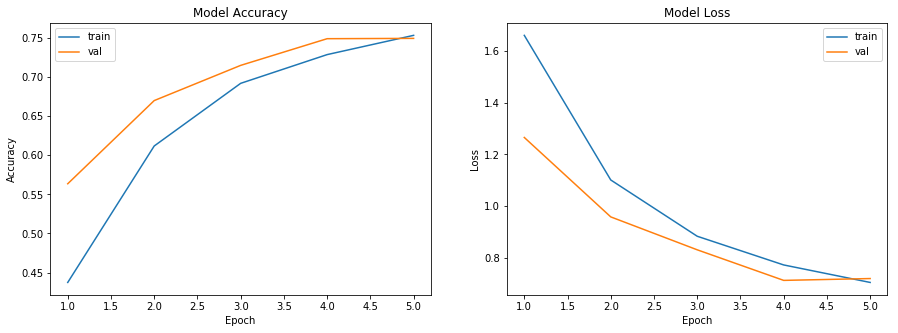

Accuracy on test data is: 74.93


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 5, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))